# Nobel Prizes across the world: Which universities had the most and the effect of the GDP on number of prizes per country

# 1. Aims, Objectives and background

## 1.1 Introduction

Nobel prize is a highly recognized prize, in different disciplines, including science, politics and literature.

Nobel prize laureates had great impacts on the humanity in the fields where they conducted their work. 

In my application to the University of London , to pursue my Bachelor Degree, I found notable alumini 
as listed here 
https://london.ac.uk/notable-past-students


This list included 6 Nobel prize winners ! 

That implied for me a high quality of education and a system to enable pursuing a work of great impact


## 1.2 Aims and objectives

This project is aiming at collecting information about the share of universities in Nobel Prize winners, distribution by country and also if there is a releation between the GDP of these countries enabling higher number of Nobel prize winners

## 1.3 Data

### 1.3.1 Sources 

The research was based on publically avaialble information either on Nobel Prize api , or Wikipedia or worldbank data. 

### 1.3.2 Limitations
The data lacked consistency. For example if you look on the GDP per country on wikipedia, you will find different numbers from reputable resources, like IMF, UN vs the World Bank data.

The information was taken for granted as it provides the high level idea needed for the target of the research

Replacing the inforatmion with a nother source, following the same scheme will enable continuous update of the research and updating the results accordingly



### 1.3.3 Challenges
Data inconsistency and improper formating , forced the switch between different sources, as sometimes data cleanup was not feasible due to technical bugs


In a different scenarion , without the enforcement of using the tech stack for the assignment, I may have used excel or numbers for some data cleanup to avoid the technical limitations / blockers I faced, which I avoided doing in this assignment

## 1.4 Ethical Considerations

### 1.4.1 Nobel Prize api
Nobel prize made its data available for public usage through their api, even without the need of using a key or a subscription

### 1.4.2 Wikipedia Webscrapping
On checking en.wikipedia.org/robots.txt , the scrapping technique used for this assignment is considered a well behaved , responsible approach, so there shouldn't be a problem doing this webscrapping for 3 website links..

The webscrapping tool used is also not in the Disallow list

Also the webscrapping implemented is a one time thing not a daily web scrapping

### 1.4.3 Worldbank Data

Worldbank data is a publically avaialble information and there is no ethical problem in using it. 

# 2. Setup


## 2.1 Development Environment

The notebook was created using :-

. Visual Studio code

. Jupyter Notebook extension 

. Anaconda 3

. Python version 3.8.3

. Mac OS Catalina ( version 10.15.7)

## 2.2 Folder and File Structure
./CSVs : This folder contains a backup copy of the exported CSVs. If there is a problem in reaching an api , or webscrapping for a website, you can use it to bypass that step and proceed with the work. Relevant details are explained in the cells 

.png files : Thes are screenshots used in the notebook for some explanatinos 


scarpe_helper.py : This is a python class used in the project to enable webscrapping

.csv : There files are downloaded / exported step by step in the project. Relevant details in the cells 

API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3469429.zip : The original data file downloaded from the worldbank

NobelPrize.ipynb : This is the project notebook

## 2.3 Libraries

Data import for the necessary libraries to implement the project

In [1]:
import re
import json
import urllib3
import requests
from bs4 import *
import pandas as pd
import seaborn as sns
from scrape_helper import *
import matplotlib.pyplot as plt
from pandas import json_normalize

# 3. Nobel Prize API

## 3.1 Data Acquisition
The Nobel Prize API is available in Json format here
http://api.nobelprize.org/v1/prize.json 
The api is available for public and doesn't need a subscription or a key

In [2]:

response = requests.get("http://api.nobelprize.org/v1/prize.json")

In [3]:
# 200 reply code shows the api is reachable 
response.status_code

200

In [4]:
# Show the utf-8 encoding of the json response
response.encoding

'utf-8'

In [5]:
# If you want to see the reply in text format , remove the comment of this next line 
# response.text

In [6]:
# Extract the text from the response
data = json.loads(response.text)

In [7]:
# Showing json structure
data

{'prizes': [{'year': '2021',
   'category': 'chemistry',
   'laureates': [{'id': '1002',
     'firstname': 'Benjamin',
     'surname': 'List',
     'motivation': '"for the development of asymmetric organocatalysis"',
     'share': '2'},
    {'id': '1003',
     'firstname': 'David',
     'surname': 'MacMillan',
     'motivation': '"for the development of asymmetric organocatalysis"',
     'share': '2'}]},
  {'year': '2021',
   'category': 'economics',
   'laureates': [{'id': '1007',
     'firstname': 'David',
     'surname': 'Card',
     'motivation': '"for his empirical contributions  to labour economics"',
     'share': '2'},
    {'id': '1008',
     'firstname': 'Joshua',
     'surname': 'Angrist',
     'motivation': '"for their methodological contributions to the analysis  of causal relationships"',
     'share': '4'},
    {'id': '1009',
     'firstname': 'Guido',
     'surname': 'Imbens',
     'motivation': '"for their methodological contributions to the analysis  of causal relation

In [8]:
# showing a flatter representation of the json data
# print(json.dumps(data))

In [9]:
# Using the pandas dataframes for the data

df = pd.DataFrame(data)

df.describe


<bound method NDFrame.describe of                                                 prizes
0    {'year': '2021', 'category': 'chemistry', 'lau...
1    {'year': '2021', 'category': 'economics', 'lau...
2    {'year': '2021', 'category': 'literature', 'la...
3    {'year': '2021', 'category': 'peace', 'laureat...
4    {'year': '2021', 'category': 'physics', 'overa...
..                                                 ...
653  {'year': '1901', 'category': 'chemistry', 'lau...
654  {'year': '1901', 'category': 'literature', 'la...
655  {'year': '1901', 'category': 'peace', 'laureat...
656  {'year': '1901', 'category': 'physics', 'laure...
657  {'year': '1901', 'category': 'medicine', 'laur...

[658 rows x 1 columns]>

In [10]:
df.shape

(658, 1)

In [11]:
df.head()

,prizes
0,"{'year': '2021', 'category': 'chemistry', 'lau..."
1,"{'year': '2021', 'category': 'economics', 'lau..."
2,"{'year': '2021', 'category': 'literature', 'la..."
3,"{'year': '2021', 'category': 'peace', 'laureat..."
4,"{'year': '2021', 'category': 'physics', 'overa..."


In [12]:
# Export the data to a csv file
# A backup of this file is available in the CSVs folder
df.to_csv('nobellaureates_apidata.csv')

In [13]:
# If there is a problem in the web access for the api, use the csv file backup saved in the CSVs folder
# Read the data from the csv file
# df = pd.read_csv('CSVs/nobellaureates_apidata.csv')

## 3.2 Data Cleaning 

Data Normalization

In [14]:
df = json_normalize(data["prizes"])
df.head()

,year,category,laureates,overallMotivation
0,2021,chemistry,"[{'id': '1002', 'firstname': 'Benjamin', 'surn...",NaN
1,2021,economics,"[{'id': '1007', 'firstname': 'David', 'surname...",NaN
2,2021,literature,"[{'id': '1004', 'firstname': 'Abdulrazak', 'su...",NaN
3,2021,peace,"[{'id': '1005', 'firstname': 'Maria', 'surname...",NaN
4,2021,physics,"[{'id': '999', 'firstname': 'Syukuro', 'surnam...","""for groundbreaking contributions to our under..."


In [15]:
df.tail()

,year,category,laureates,overallMotivation
653,1901,chemistry,"[{'id': '160', 'firstname': 'Jacobus H.', 'sur...",NaN
654,1901,literature,"[{'id': '569', 'firstname': 'Sully', 'surname'...",NaN
655,1901,peace,"[{'id': '462', 'firstname': 'Henry', 'surname'...",NaN
656,1901,physics,"[{'id': '1', 'firstname': 'Wilhelm Conrad', 's...",NaN
657,1901,medicine,"[{'id': '293', 'firstname': 'Emil', 'surname':...",NaN


Some years didn't have nobel prizes awarded

In [16]:
df[295:300]

,year,category,laureates,overallMotivation
295,1972,economics,"[{'id': '681', 'firstname': 'John R.', 'surnam...",NaN
296,1972,literature,"[{'id': '647', 'firstname': 'Heinrich', 'surna...",NaN
297,1972,peace,NaN,"""No Nobel Prize was awarded this year. The pri..."
298,1972,physics,"[{'id': '66', 'firstname': 'John', 'surname': ...",NaN
299,1972,medicine,"[{'id': '398', 'firstname': 'Gerald M.', 'surn...",NaN


In [17]:
df[443:466]

,year,category,laureates,overallMotivation
443,1943,chemistry,"[{'id': '201', 'firstname': 'George', 'surname...",NaN
444,1943,literature,NaN,"""No Nobel Prize was awarded this year. The pri..."
445,1943,peace,NaN,"""No Nobel Prize was awarded this year. The pri..."
446,1943,physics,"[{'id': '48', 'firstname': 'Otto', 'surname': ...",NaN
447,1943,medicine,"[{'id': '335', 'firstname': 'Henrik', 'surname...",NaN
448,1942,chemistry,NaN,"""No Nobel Prize was awarded this year. The pri..."
449,1942,literature,NaN,"""No Nobel Prize was awarded this year. The pri..."
450,1942,peace,NaN,"""No Nobel Prize was awarded this year. The pri..."
451,1942,physics,NaN,"""No Nobel Prize was awarded this year. The pri..."
452,1942,medicine,NaN,"""No Nobel Prize was awarded this year. The pri..."


Data cleanup by deleting the rows with no prizes

In [18]:
# Drop rows with no prizes to clean up the data
df.dropna(subset = ["laureates"], inplace = True)

Showing the rows are now deleted

In [19]:
df[443:466]

,year,category,laureates,overallMotivation
467,1939,medicine,"[{'id': '334', 'firstname': 'Gerhard', 'surnam...",NaN
468,1938,chemistry,"[{'id': '198', 'firstname': 'Richard', 'surnam...",NaN
469,1938,literature,"[{'id': '610', 'firstname': 'Pearl', 'surname'...",NaN
470,1938,peace,"[{'id': '503', 'motivation': '""for having carr...",NaN
471,1938,physics,"[{'id': '46', 'firstname': 'Enrico', 'surname'...",NaN
472,1938,medicine,"[{'id': '333', 'firstname': 'Corneille', 'surn...",NaN
473,1937,chemistry,"[{'id': '196', 'firstname': 'Norman', 'surname...",NaN
474,1937,literature,"[{'id': '609', 'firstname': 'Roger', 'surname'...",NaN
475,1937,peace,"[{'id': '502', 'firstname': 'Robert', 'surname...",NaN
476,1937,physics,"[{'id': '44', 'firstname': 'Clinton', 'surname...",NaN


In [20]:
# No more rows without nobel prizes
df[df['laureates'].isna()]

,year,category,laureates,overallMotivation


Replacing Nan with a better readable value

For the prizes that had no motivation recorded 

( I didn't find a need to replace it with a zero, as those that were supposed to be '1' had a narration to read, so preferred to keep it "Motivation not recorded")

In [21]:
# Replace Nan in overallMotivation with Motivation not recorded
df['overallMotivation'] = df['overallMotivation'].fillna('Motivation not recorded')

In [22]:
df.tail()

,year,category,laureates,overallMotivation
653,1901,chemistry,"[{'id': '160', 'firstname': 'Jacobus H.', 'sur...",Motivation not recorded
654,1901,literature,"[{'id': '569', 'firstname': 'Sully', 'surname'...",Motivation not recorded
655,1901,peace,"[{'id': '462', 'firstname': 'Henry', 'surname'...",Motivation not recorded
656,1901,physics,"[{'id': '1', 'firstname': 'Wilhelm Conrad', 's...",Motivation not recorded
657,1901,medicine,"[{'id': '293', 'firstname': 'Emil', 'surname':...",Motivation not recorded


Now having a deeper look on the Laureates themselves

In [23]:
df["laureates"]

0      [{'id': '1002', 'firstname': 'Benjamin', 'surn...
1      [{'id': '1007', 'firstname': 'David', 'surname...
2      [{'id': '1004', 'firstname': 'Abdulrazak', 'su...
3      [{'id': '1005', 'firstname': 'Maria', 'surname...
4      [{'id': '999', 'firstname': 'Syukuro', 'surnam...
                             ...                        
653    [{'id': '160', 'firstname': 'Jacobus H.', 'sur...
654    [{'id': '569', 'firstname': 'Sully', 'surname'...
655    [{'id': '462', 'firstname': 'Henry', 'surname'...
656    [{'id': '1', 'firstname': 'Wilhelm Conrad', 's...
657    [{'id': '293', 'firstname': 'Emil', 'surname':...
Name: laureates, Length: 609, dtype: object

Create a new data frame for the Laureates for more deeper inspection and versioning so as not to mess the original data

In [24]:
# dfl = pd.DataFrame(df["laureates"],columns=['id', 'firstname', 'surname', 'motivation', 'share']) 
dfl = pd.DataFrame(df["laureates"])

dfl

,laureates
0,"[{'id': '1002', 'firstname': 'Benjamin', 'surn..."
1,"[{'id': '1007', 'firstname': 'David', 'surname..."
2,"[{'id': '1004', 'firstname': 'Abdulrazak', 'su..."
3,"[{'id': '1005', 'firstname': 'Maria', 'surname..."
4,"[{'id': '999', 'firstname': 'Syukuro', 'surnam..."
...,...
653,"[{'id': '160', 'firstname': 'Jacobus H.', 'sur..."
654,"[{'id': '569', 'firstname': 'Sully', 'surname'..."
655,"[{'id': '462', 'firstname': 'Henry', 'surname'..."
656,"[{'id': '1', 'firstname': 'Wilhelm Conrad', 's..."


In [25]:

# The line is a list of different multiple dictionairies
dfl["laureates"][0]

[{'id': '1002',
  'firstname': 'Benjamin',
  'surname': 'List',
  'motivation': '"for the development of asymmetric organocatalysis"',
  'share': '2'},
 {'id': '1003',
  'firstname': 'David',
  'surname': 'MacMillan',
  'motivation': '"for the development of asymmetric organocatalysis"',
  'share': '2'}]

In [26]:
# I tried to expand the laureates by normalization as well as multiple different approaches but it didn't work 
# I ignored anyway as I had that data availavble from future resources
# dfl = json_normalize(data["laureates"])

In [27]:
# Tried to use regular expressions to clean the data in the laureates but it didn't work 
# dfl["laureates"] = df["laureates"].str.replace("'", '"')
# dfl.replace({'\'': '"'}, regex=True)
# for index, row in dfl.iterrows():
#     dfl.at[index].replace({'\'', '"'}, regex=True)
#     dfl.at[index].replace({"{{", ''}, regex=True)
#     dfl.at[index].replace({"}}", ''}, regex=True)



In [28]:
# dfl_laureates = dfl["laureates"]
# pd.json.normalize(dfl_laureates, 'id', 'firstname', 'surname', 'motivation', 'share').set_index('id').stack().reset_index().rename(columns={'level_1': 'firstname', 0:'surname'})

# display(dfl_laureates)

In [29]:
# json_normalize(df["prizes"])
# json_normalize(dfl["laureates"])




In [30]:
# df_Laureates = pd.DataFrame(df["laureates"])
# df_Laureates = []

# for i in df["laureates"]:
#     data = json.loads(i)
#     df_Laureates = pd.json_normalize(data, record_path=['category'], meta=[['id', 'firstName', 'surname']])

In [31]:
# dfl_n = pd.json_normalize(dfl.pop("laureates"))
# dfl_n



In [32]:
# 
# def list_to_dict(row):
#     d = {}
#     for i in row:
#         d['id'] = row[0]
#         d['firstname']=row[1]
#         d['surname']= row[2]
#         d['motivation']=row[3]
#         d['share']=row[4]
#     return d

# def writeJSON(data):
#     with open('laureates.json','w', encoding='utf-8') as f:
#         json.dump(data, f, ensure_ascii=False)
        
#     print(list_to_dict(row))

##  3.3 Analysis

The data from the Nobel prize api was limited. It only included:-
1. Years
2. Category
3. Leureates 
    - First Name 
    - Surname
    - Share ( whether that prize was shared with others or no)
    - Motivation

These data , although was informative, was not enough to pursue the study, so I proceeded to gather more information from Wikipedia with webscrapping

# 4.0 Nobel prize winners by country - Webscrapping Wikipedia


## 4.1 Data Acquisition

Wikipedia has a list of Nobel Prize laureates, categorized by country , available here

https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country

I decided to use webscrapping as a technique for data acquistion to gather the datta from wikipedia 

In [33]:
# Nobel by country https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country
url_nbc = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country"

# Pull the data from the webpage
http_nbc = urllib3.PoolManager()
response_url_nbc = http_nbc.request('GET',url_nbc)

# Create a beautiful soup objet, passing in the page data
soup_nbc = BeautifulSoup(response_url_nbc.data, "lxml")

Inspect the first part of the Beautiful Soup object to see what it containts

In [34]:
str(soup_nbc)[:5000]

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8"/>\n<title>List of Nobel laureates by country - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"09ee97f5-51a3-465a-b028-38dada2d9d5f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Nobel_laureates_by_country","wgTitle":"List of Nobel laureates by country","wgCurRevisionId":1059166862,"wgRevisionId":1059166862,"wgArticleId":1811842,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Articles with short description","Short descript

In [35]:
# Show all link tags
soup_nbc.find_all('a')[:20]

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="external text" href="https://en.wikipedia.org/w/index.php?title=List_of_Nobel_laureates_by_country&amp;action=edit">improve it</a>,
 <a href="/wiki/Talk:List_of_Nobel_laureates_by_country" title="Talk:List of Nobel laureates by country">talk page</a>,
 <a href="/wiki/Help:Maintenance_template_removal" title="Help:Maintenance template removal">Learn how and when to remove these template messages</a>,
 <a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100p

In [36]:
# All links within link tags:
for link in soup_nbc.find_all('a')[:20]:
    print(link.get('href'))

None
#mw-head
#searchInput
https://en.wikipedia.org/w/index.php?title=List_of_Nobel_laureates_by_country&action=edit
/wiki/Talk:List_of_Nobel_laureates_by_country
/wiki/Help:Maintenance_template_removal
/wiki/File:Question_book-new.svg
/wiki/Wikipedia:Verifiability
https://en.wikipedia.org/w/index.php?title=List_of_Nobel_laureates_by_country&action=edit
/wiki/Help:Referencing_for_beginners
//www.google.com/search?as_eq=wikipedia&q=%22List+of+Nobel+laureates+by+country%22
//www.google.com/search?tbm=nws&q=%22List+of+Nobel+laureates+by+country%22+-wikipedia&tbs=ar:1
//www.google.com/search?&q=%22List+of+Nobel+laureates+by+country%22&tbs=bkt:s&tbm=bks
//www.google.com/search?tbs=bks:1&q=%22List+of+Nobel+laureates+by+country%22+-wikipedia
//scholar.google.com/scholar?q=%22List+of+Nobel+laureates+by+country%22
https://www.jstor.org/action/doBasicSearch?Query=%22List+of+Nobel+laureates+by+country%22&acc=on&wc=on
/wiki/Help:Maintenance_template_removal
/wiki/Wikipedia:Cleanup
/wiki/Wikipedia:

# Understanding the page source

I tried to open the page source, to figure out the location of the table in the html code

![nbc_source](nbc_source.png)

### Then searched for 398 (The first number in the table) to show its location in the code
![nbc_summary](nbc_summary.png)

![nbc_summarycode](nbc_summarycode.png)

The table we are targeting is "wikitable sortable"

In [37]:
# find the summary table
table_nbc = soup_nbc.find('table', {'class': 'wikitable sortable'})
df_nbc = tableToDataFrame(table_nbc)
df_nbc.head()


,Index,Country,Number of Nobel laureates
0,,United States,398 (400)[Note 1]
1,,United Kingdom,137 (138)[Note 2]
2,,Germany,111
3,,France,70 (71)[Note 3]
4,,Russia/ Soviet Union,32


In [38]:
# Export the data to a csv file
df_nbc.to_csv('nobellaureates_bycountry.csv')

In [39]:
# If there is a problem in the web access for the wikipedia website, or the structure changed,use the csv file backup saved in the CSVs folder

# df_nbc = pd.read_csv('CSVs/nobellaureates_bycountry.csv')

In [40]:
df_nbc.head(20)

,Index,Country,Number of Nobel laureates
0,,United States,398 (400)[Note 1]
1,,United Kingdom,137 (138)[Note 2]
2,,Germany,111
3,,France,70 (71)[Note 3]
4,,Russia/ Soviet Union,32
5,,Sweden,32
6,,Japan,29
7,,Canada,28
8,,Switzerland,27
9,,Austria,22


## 4.2 Data Cleanup

The values for "Number of Nobel Laureates" by country in United states, United Kindgom , France and Poland needed fixing 

In [41]:
# Regular expression approach caused errors, so I preferred to go manually
# def stripReference(text):
#     # Remove any references
#     f = text.find("[")
#     if f >=0:
#         text = text[:f]
#     # f = text.find("(")
#     # if f >=0:
#     #     text = text[:f]
#     return text

Considering these are only 4 values, I tried to clean them manually

In [42]:
df_nbc['Number of Nobel laureates'] = df_nbc['Number of Nobel laureates'].replace(['398 (400)[Note 1]'],'398')

In [43]:
df_nbc['Number of Nobel laureates'] = df_nbc['Number of Nobel laureates'].replace(['137 (138)[Note 2]'],'137')

In [44]:
df_nbc['Number of Nobel laureates'] = df_nbc['Number of Nobel laureates'].replace(['70 (71)[Note 3]'],'70')

In [45]:
df_nbc['Number of Nobel laureates'] = df_nbc['Number of Nobel laureates'].replace(['18 (19)[Note 3]'],'18')

The data is now cleaned showing the right numbers of Nobel Laureates 

In [46]:
df_nbc.head(20)

,Index,Country,Number of Nobel laureates
0,,United States,398
1,,United Kingdom,137
2,,Germany,111
3,,France,70
4,,Russia/ Soviet Union,32
5,,Sweden,32
6,,Japan,29
7,,Canada,28
8,,Switzerland,27
9,,Austria,22


Still two extra columns there are not needed (unnamed:0 and Index)

Some deleting these two columns to clean the table

In [47]:
# df_nbc = df_nbc.drop(["Unnamed: 0", "Index"], axis = 1)

In [48]:
df_nbc.head()

,Index,Country,Number of Nobel laureates
0,,United States,398
1,,United Kingdom,137
2,,Germany,111
3,,France,70
4,,Russia/ Soviet Union,32


## 4.3 Data Analysis

In [49]:
print(df_nbc.shape)

(82, 3)


In [50]:
df_nbc.dtypes

Index                        object
Country                      object
Number of Nobel laureates    object
dtype: object

I preferred to convert the "Number of Nobel laureates" to integer values

In [51]:
df_nbc["Number of Nobel laureates"] = pd.to_numeric(df_nbc["Number of Nobel laureates"])

In [52]:
df_nbc.dtypes

Index                        object
Country                      object
Number of Nobel laureates     int64
dtype: object

In [53]:
df_nbc.describe()

,Number of Nobel laureates
count,82.000000
mean,14.402439
std,47.826812
min,1.000000
25%,1.000000
50%,2.000000
75%,11.000000
max,398.000000


Out of 82 countries with Nobel prizes :-
- Men is 14
- Max is 398
- Min is 1

Of course countries without noble prizes ( 0 ) are not in this statistic

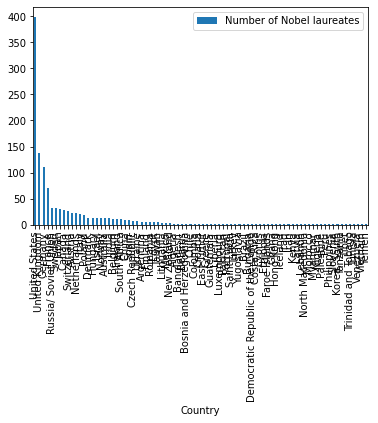

In [54]:
df_nbc.plot.bar(x = 'Country', y = 'Number of Nobel laureates')

The overlap between the country names is extreme, so I created a new dataframe with only the top 30 to do the graphing properly

In [55]:
df_nbc30 = df_nbc[:30]
df_nbc30

,Index,Country,Number of Nobel laureates
0,,United States,398
1,,United Kingdom,137
2,,Germany,111
3,,France,70
4,,Russia/ Soviet Union,32
5,,Sweden,32
6,,Japan,29
7,,Canada,28
8,,Switzerland,27
9,,Austria,22


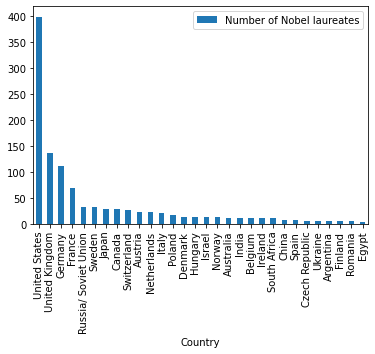

In [56]:
df_nbc30.plot.bar(x = 'Country', y = 'Number of Nobel laureates')

## 4.4 Conclusions
The countries with the highest number of Nobel prizes are United States, United Kingdom , Germany , France and Russia

# 5.0 Nobel prize winners by uinversity - Webscrapping Wikipedia

## 5.1 Data Acquistion


Wikipedia has a list of Nobel Prize laureates, categorized by university, available here
https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_university_affiliation

I decided to use webscapping as a technique for data acquistion to gather the data from wikipedia

In [57]:
# Nobel prize laureates by university  https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_university_affiliation
url_nbu = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_university_affiliation"

# Pull the data from the webpage
http_nbu = urllib3.PoolManager()
response_url_nbu = http_nbu.request('GET',url_nbu)

# Create a beautiful soup objet, passing in the page data
soup_nbu = BeautifulSoup(response_url_nbu.data, "lxml")

Inspecting the first part of the Beautiful Soup to see what it contains

In [58]:
str(soup_nbu)[:5000]

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8"/>\n<title>List of Nobel laureates by university affiliation - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d1614f96-03e2-4cdd-9344-742835d1c5a1","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Nobel_laureates_by_university_affiliation","wgTitle":"List of Nobel laureates by university affiliation","wgCurRevisionId":1062573815,"wgRevisionId":1062573815,"wgArticleId":2561323,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short

In [59]:
# Show all link tags
soup_nbu.find_all('a')[:20]

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/University" title="University">university</a>,
 <a href="/wiki/Nobel_Prize" title="Nobel Prize">Nobel Prize</a>,
 <a href="/wiki/Nobel_Memorial_Prize_in_Economic_Sciences" title="Nobel Memorial Prize in Economic Sciences">Nobel Memorial Prize in Economic Sciences</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="#cite_note-latimes2000-10-19-2">[2]</a>,
 <a href="#cite_note-3">[3]</a>,
 <a href="/wiki/Alexei_Abrikosov_(physicist)" title="Alexei Abrikosov (physicist)">Alexei Abrikosov</a>,
 <a href="/wiki/Argonne_National_Laboratory" title="Argonne National Laboratory">Argonne National Laboratory</a>,
 <a href="/wiki/Edgar_Adrian" title="Edgar Adrian">Edgar Adrian</a>,
 <a href="/wiki/University_of_Cambridge" title="University of Cambridge">University of Cambridge</a>,
 <a href="/wiki/Peter_Agre" title="Peter Agre">Peter Agre</

In [60]:
# All links within link tags:
for link in soup_nbu.find_all('a')[:20]:
    print(link.get('href'))

None
#mw-head
#searchInput
/wiki/University
/wiki/Nobel_Prize
/wiki/Nobel_Memorial_Prize_in_Economic_Sciences
#cite_note-1
#cite_note-latimes2000-10-19-2
#cite_note-3
/wiki/Alexei_Abrikosov_(physicist)
/wiki/Argonne_National_Laboratory
/wiki/Edgar_Adrian
/wiki/University_of_Cambridge
/wiki/Peter_Agre
/wiki/Johns_Hopkins_School_of_Medicine
/wiki/Isamu_Akasaki
/wiki/Meijo_University
/wiki/Nagoya_University
/wiki/George_Akerlof
/wiki/University_of_California,_Berkeley


# Understanding the page source
I tried to open the page source, to figure out the location of the table in the HTML code

![nbu_source](nbu_source.png)



### Then searched for Argonne (The first university in the table) to show its location in the code
![nbu_summary](nbu_summary.png)

![nbu_summarycode](nbu_summarycode.png)

The target table is "wikitable sortable"

In [61]:
# find the summary table
table_nbu = soup_nbu.find('table', {'class': 'wikitable sortable'})
df_nbu = tableToDataFrame(table_nbu)
df_nbu.head(10)


,Index,Laureate,Discipline,Year of award,Affiliation
0,,Alexei Abrikosov,Physics,2003,Argonne National Laboratory
1,,Edgar Adrian,Physiology or Medicine,1932,University of Cambridge
2,,Peter Agre,Chemistry,2003,Johns Hopkins School of Medicine
3,,Isamu Akasaki,Physics,2014,Meijo University
4,,Nagoya University,,,
5,,George Akerlof,Economics,2001,"University of California, Berkeley"
6,,Kurt Alder,Chemistry,1950,University of Cologne
7,,Zhores Alferov,Physics,2000,Ioffe Institute
8,,Hannes Alfvén,Physics,1970,KTH Royal Institute of Technology
9,,Maurice Allais,Economics,1988,Mines ParisTech


In [62]:
# Export the data to a csv file
df_nbu.to_csv('nobellaureates_byuinversity.csv')

In [63]:
# If there is a problem in the web access for the wikipedia website, or the structure changed,use the csv file backup saved in the CSVs folder

# df_nbu = pd.read_csv('CSVs/nobellaureates_byuinversity.csv')

In [64]:
affiliations = df_nbu['Affiliation']
affiliations

0                 Argonne National Laboratory
1                     University of Cambridge
2            Johns Hopkins School of Medicine
3                            Meijo University
4                                            
                        ...                  
783                   University of Groningen
784        California Institute of Technology
785    Max Planck Institute for Coal Research
786                      University of Zurich
787                   University of Göttingen
Name: Affiliation, Length: 788, dtype: object

## 5.2 Data Cleaning

The data was relatively clean and no modifications were needed

## 5.3 Analysis

### 5.3.1 Analysis and graphical presentation of universities by number of awards

In [65]:
# Converting the Affiliations to a set , to have the unique values 
affiliations = set(df_nbu['Affiliation'])
affiliations

{'',
 'AGA AB',
 'Aarhus University',
 'Academy of Sciences of the Soviet Union',
 'Agricultural University of Berlin',
 'All Souls College, Oxford',
 'Argonne National Laboratory',
 'Arizona State University',
 'Asahi Kasei',
 'Associated Universities, Inc.',
 'Atomic Energy Research Establishment',
 'Australian National University',
 'Basel Institute for Immunology',
 'Beckman Instruments',
 'Bell Labs',
 'Bellevue Hospital',
 'Binghamton University',
 'Biozentrum University of Basel',
 "Boston Children's Hospital",
 'Boston University School of Medicine',
 'Brandeis University',
 "Brigham and Women's Hospital",
 'Brown University',
 'CERN',
 'California Institute of Technology',
 'Cardiff University',
 'Carnegie Institution for Science',
 'Carnegie Mellon University',
 'Case Western Reserve University',
 'Central Research Laboratories',
 'China Academy of Traditional Chinese Medicine',
 'Chinese University of Hong Kong',
 'City University of New York',
 'Clare Hall laboratories',
 '

Creating a pie chart to present the universities and their share of Nobel prizes

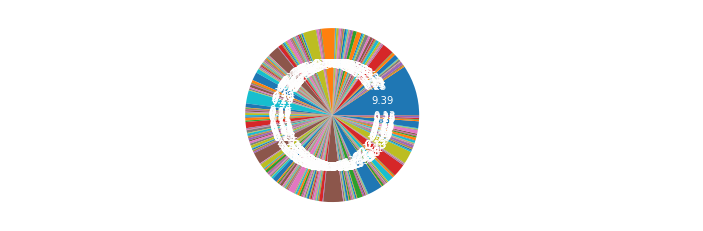

In [66]:
affiliations = (set(df_nbu['Affiliation']))
counts = [df_nbu.loc[df_nbu['Affiliation'] == name].size for name in affiliations]

plt.figure()

plt.pie(counts,
        labels = affiliations, 
        textprops={'color' :"white"},
        autopct = '%1.2f'
        )

plt.show()

This representation of the university shares of Nobel Prize affiliation in a pie chart is not a suitable presentation , so I tried to do it in  histogram for the sake of clarity of visual presentation 

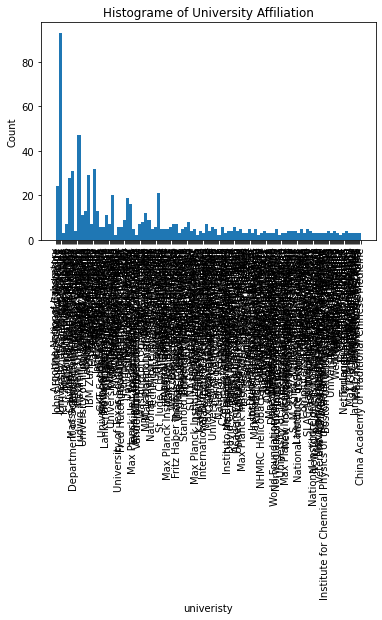

In [67]:

university = set(df_nbu['Affiliation'])

plt.figure()
plt.hist(df_nbu["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Due to the overlap in the names of the universities, and the big number of affiliated universities , I plotted them again in graphs of 30 universities each 

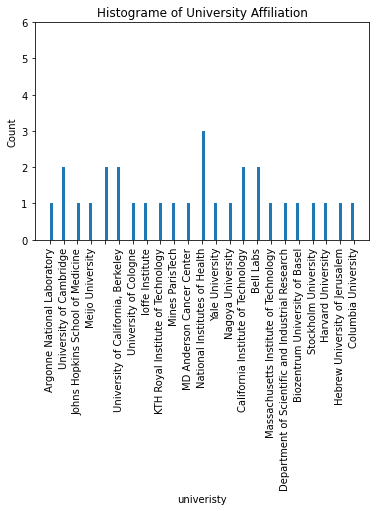

In [68]:
university = set(df_nbu['Affiliation'])

plt.figure()
plt.hist(df_nbu[:30]["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.ylim(0, 6)
plt.xticks(rotation=90)
plt.show()

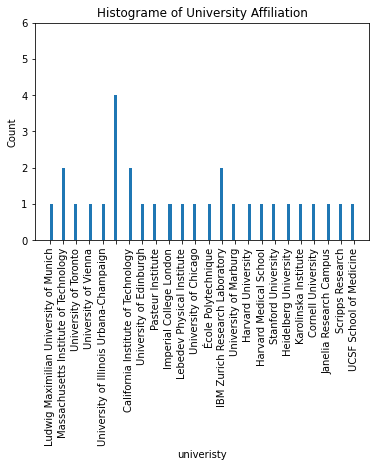

In [69]:
plt.figure()
plt.hist(df_nbu[30:60]["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.ylim(0, 6)
plt.xticks(rotation=90)
plt.show()

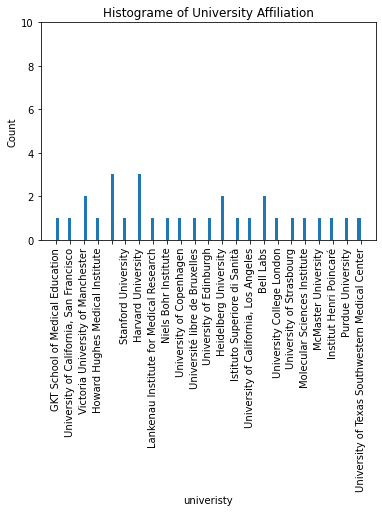

In [70]:
plt.figure()
plt.hist(df_nbu[60:90]["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.ylim(0, 10)
plt.xticks(rotation=90)
plt.show()

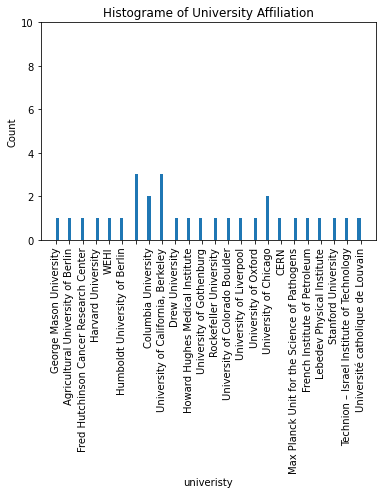

In [71]:
plt.figure()
plt.hist(df_nbu[90:120]["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.ylim(0, 10)
plt.xticks(rotation=90)
plt.show()

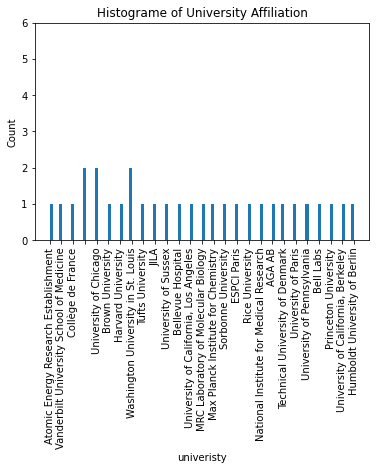

In [72]:
plt.figure()
plt.hist(df_nbu[120:150]["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.ylim(0, 6)
plt.xticks(rotation=90)
plt.show()

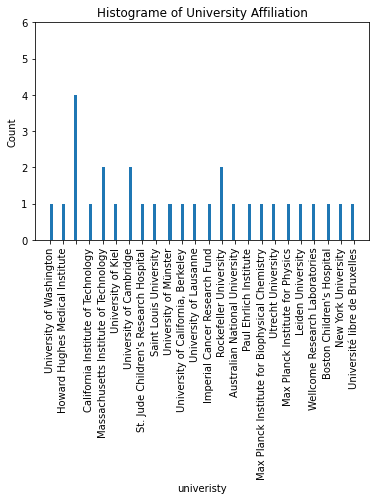

In [73]:
plt.figure()
plt.hist(df_nbu[150:180]["Affiliation"], bins = 100)
plt.title("Histograme of University Affiliation")
plt.xlabel("univeristy")
plt.ylabel("Count")
plt.ylim(0, 6)
plt.xticks(rotation=90)
plt.show()

These are just some examples of the presentation of the universities

Also tried to count the Top 10 uinversities by Nobel prize affiliations

In [74]:
df_nbu_counts = df_nbu['Affiliation'].value_counts(ascending=False)
df_nbu_counts.head(10)


                                         74
Harvard University                       29
Massachusetts Institute of Technology    22
Stanford University                      20
California Institute of Technology       19
University of Cambridge                  19
University of Chicago                    19
University of California, Berkeley       18
Rockefeller University                   17
Columbia University                      17
Name: Affiliation, dtype: int64

### 5.3.2 Analysis and Graphical Presentation of Nobel prize winners by Discipline


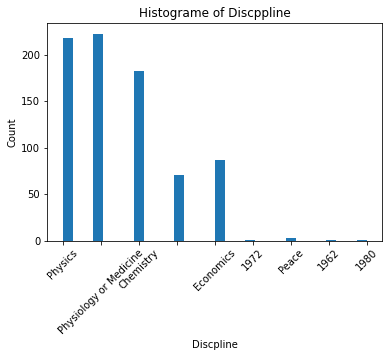

In [75]:

Disciplines = set(df_nbu['Discipline'])

plt.figure()
plt.hist(df_nbu["Discipline"], bins = 30)
plt.title("Histograme of Discppline")
plt.xlabel("Discpline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


From this histogram, it is shown that The biggest Nobel Prize shares goes to Physics, Chemistry and Medicinie, which implies that The focus is more on scientific discplines


## 5.4 Conclusions

From the analysis of the graphs and sorts for the Universities and Discplines I found that :-
. Top 10 universities with Nobel Prizes :-
    . 1 Univesity in UK ( University of cambridge)
    . 9 Universities in  USA 
. The biggest share of Nobel Prizes goes to the Science based discplines ( Physics, Chemistry and Medicine) when compared to Economics, Literature and Peace

# 6.0 GDP By country : World Bank Data

## 6.1 Data Acquisiton

For the data related to the countries GDP, I started first with webscrapping the wikipedia page, but had a lot of conflicting information , as well as the data needed a lot of cleaning , which was unncessary.

So after finding I decided to go for the worldbank for a cleaner data

 

I also used the previous data in the Nobel prize by country , to simulate join when selecting the coutries for the GDP in the data cleaning phase

### 6.1.1 Webscrapping Wikipedia for GDP data

In [76]:
# GDP by country  https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
url_gdp = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

# Pull the data from the webpage
http_gdp = urllib3.PoolManager()
response_url_gdp = http_gdp.request('GET',url_nbu)

# Create a beautiful soup objet, passing in the page data
soup_gdp = BeautifulSoup(response_url_gdp.data, "lxml")

Inspecting the first part of the beautiful soup to see what it contains

In [77]:
str(soup_gdp)[:5000]

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8"/>\n<title>List of Nobel laureates by university affiliation - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d1614f96-03e2-4cdd-9344-742835d1c5a1","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Nobel_laureates_by_university_affiliation","wgTitle":"List of Nobel laureates by university affiliation","wgCurRevisionId":1062573815,"wgRevisionId":1062573815,"wgArticleId":2561323,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short

# Understanding the page source


![gdp_source](gdp_source.png)

### Then searched for 20,936,600 (The first GDP in the table in world bank column) to show its location in the code
![gdp_summary](gdp_summary.png)

![gdp_summarycode](gdp_summarycode.png)

In [78]:
# find the summary table
# table_gdp = soup_gdp.find('table', {'class': 'wikitable sortable static-row-numbers plainrowheaders srn-white-background'})
# df_gdp = tableToDataFrame(table_gdp)
# df_gdp.head()



# This kept generating errors

The data on wikipedia involved lots of unnecessary cleanup needed ot have a clean table structure, so I preferred to go on another simpler approach and just get the data from the world bank


### 6.1.2 Downloading GDP data from the worldbank

Another approach , world bank data , for GDP per country
https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
(I downloaded the zip file and got API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3469429.csv file . I renamed to worldbank_gdp.csv and left a backup copy in the CSVs folder)


Create the csv dataframe

<code>
df_gdp = pd.read_csv('worldbank_gdp.csv')
</code>

The first 4 rows are just spaces, and information about the file, the header starts at line 5, so without any cleanup needed, just skipped the first 4 rows to create the dataframe

In [79]:
df_gdp = pd.read_csv('worldbank_gdp.csv', skiprows=4)

In [80]:
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.498491e+11,9.635604e+11,9.837486e+11,9.186471e+11,8.720235e+11,9.842556e+11,1.011723e+12,1.008375e+12,9.188155e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,7.275714e+11,8.207876e+11,8.514872e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,NaN


## 6.2 Data Cleaning

I created a New dataframe from the main one with only the country code and the GDP for 2020


In [81]:
df_gdp2020 = df_gdp[['Country Name','2020']].copy()
df_gdp2020

,Country Name,2020
0,Aruba,NaN
1,Africa Eastern and Southern,9.188155e+11
2,Afghanistan,2.011614e+10
3,Africa Western and Central,7.845876e+11
4,Angola,5.837598e+10
...,...,...
261,Kosovo,7.716925e+09
262,"Yemen, Rep.",NaN
263,South Africa,3.354421e+11
264,Zambia,1.811063e+10


In [82]:
df_gdp2020.dtypes

Country Name     object
2020            float64
dtype: object

Cleaning the countires with Nan GDP , replacing the value to Zero

In [83]:
df_gdp2020['2020'] = df_gdp2020['2020'].fillna(0)

In [84]:
df_gdp2020

,Country Name,2020
0,Aruba,0.000000e+00
1,Africa Eastern and Southern,9.188155e+11
2,Afghanistan,2.011614e+10
3,Africa Western and Central,7.845876e+11
4,Angola,5.837598e+10
...,...,...
261,Kosovo,7.716925e+09
262,"Yemen, Rep.",0.000000e+00
263,South Africa,3.354421e+11
264,Zambia,1.811063e+10


## 6.3 Analysis

To be able to analyze this data in the relevant context, This data needs further cleaning as it has GDP for all the countries ( even if the data was replaced with Zero), as well as groupings , like World, or Africa Easterm and Southern, or Africa Western and Central ..etc

So prepared a list of all the countries only with Nobel prizes to analyze their GDP

From the previous analysis in Nobel By Country 

In [85]:
countries = df_nbc['Country']
countries

0            United States
1           United Kingdom
2                  Germany
3                   France
4     Russia/ Soviet Union
              ...         
77     Trinidad and Tobago
78                 Tunisia
79               Venezuela
80                 Vietnam
81                   Yemen
Name: Country, Length: 82, dtype: object

Preparing a dataframe for GDP analysis with Only countries that had noble prizes

In [86]:
df_gdp2020_withnp = df_gdp2020.loc[df_gdp2020["Country Name"].isin(countries)]
df_gdp2020_withnp

,Country Name,2020
9,Argentina,3.892881e+11
13,Australia,1.327836e+12
14,Austria,4.332585e+11
17,Belgium,5.218613e+11
20,Bangladesh,3.230570e+11
...,...,...
246,Tanzania,6.240971e+10
248,Ukraine,1.554990e+11
251,United States,2.089375e+13
257,Vietnam,2.711584e+11


In [87]:
sorted_gdp2020_withnp = df_gdp2020_withnp.sort_values(by=['2020'], ascending=False)
sorted_gdp2020_withnp


,Country Name,2020
251,United States,2.089375e+13
40,China,1.472273e+13
119,Japan,5.057759e+12
55,Germany,3.846414e+12
81,United Kingdom,2.764198e+12
...,...,...
242,Trinidad and Tobago,2.158804e+10
24,Bosnia and Herzegovina,1.994650e+10
157,North Macedonia,1.226371e+10
131,Liberia,3.201188e+09


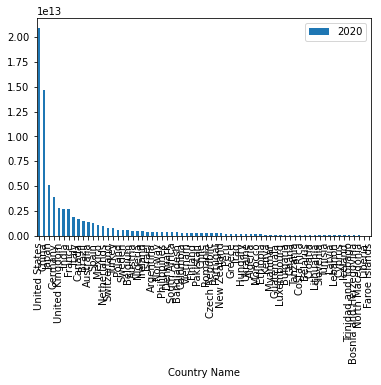

In [88]:
sorted_gdp2020_withnp.plot.bar(x = 'Country Name', y = '2020')

Then optimized to show the top 30 countries

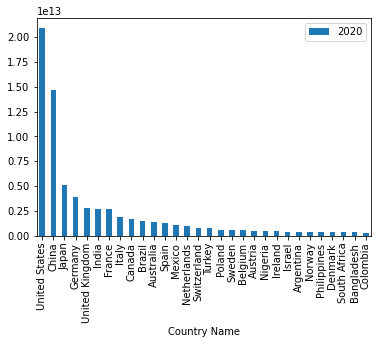

In [89]:
sorted_gdp2020_withnpTop30 = sorted_gdp2020_withnp[:30]
sorted_gdp2020_withnpTop30.plot.bar(x = 'Country Name', y = '2020')


## 6.4 Conclusion

The conuntries with the highest GDP in 2020 were United States, China, Japan, Germany and United Kingdom

# 7.0 Final Conslusion and critical evaluation 


Top 5 countries by Nobel laureate were :-
- United States 
- United Kingdom 
- Germany 
- France 
- Russia

Then Japan (7th ) and China ( 24th)

Top 5 countries by GDP were :-
- United States
- China
- Japan 
- Germany 
- United Kingdom 
- India

Then comes France

This shows that there is already a high correlation between the GDP and the  number of Nobel prizes , but it doesn’t mean causality. 
Because, a country like China comes at a very late rank ( 24th ) while its GDP is the second. 


Countries even with a very high income per capita, like Gulf Region ( Qatar, Kuwait and UAE) didn’t have any noble prizes, and countries with lowe income like India and Egypt had 12 and 4 prizes respectively. 



To have a really clear idea on why some countries have more Nobel prizes compared to others, more factors should be inluded like :-
- Effect of immigration 
- Laws
- Freedom of speech 
- Quality of Education on different levels
- The university ( and country ) where the Laureate got his education , versus , the one where he conducted the research that nomitated him / her for the Nobel prize
- Funding of the univesity
- Effect of private sector in motivating and funding the research 


These factors, may still be recognizable in science based domains , but ohers like Literature and Peace may need other factors to be able to analyze

Multiple regression models can be conducted on a future research to analyze the impact and weight of each factor

That study can be a start for more ones to improve the global resarch / education system , not just for more noble prizes, but for the whole impact on the world that will gain the benefits of the outcomes of these researches conducted by talented scientists in different domains

# 8.0 References

Data :-
- Country GDP https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
- Nobel by country https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country
- Nobel by university https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_university_affiliation
- Univrsity of London Notable pas students https://london.ac.uk/notable-past-students
- Worldbank GDP https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv

Tech:-
- https://www.markdownguide.org/cheat-sheet/
- https://www.markdownguide.org/basic-syntax/
- https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path
- https://stackoverflow.com/questions/65849528/how-to-transform-a-list-of-dictionaries-containing-nested-lists-into-a-pandas-
- https://datatofish.com/replace-values-pandas-dataframe/
- https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
- https://docs.python.org/3/library/re.html
- https://stackoverflow.com/questions/37725195/pandas-replace-values-based-on-index
- https://moonbooks.org/Articles/How-to-replace-rows-of-a-dataframe-using-rows-of-another-dataframe-based-on-indexes-with-pandas-/
- https://docs.python.org/3/library/re.html
- https://www.w3schools.com/python/matplotlib_scatter.asp
- https://datahelpdesk.worldbank.org/knowledgebase/articles/898599-indicator-api-queries
- https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
- https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
- https://www.geeksforgeeks.org/get-a-specific-row-in-a-given-pandas-dataframe/
- https://www.w3schools.com/python/gloss_python_escape_characters.asp
- https://stackoverflow.com/questions/5466451/how-can-i-print-literal-curly-brace-characters-in-a-string-and-also-use-format#:~:text=Format%20strings%20contain%20%E2%80%9Creplacement%20fields,by%20doubling%3A%20%7B%7B%20and%20%7D%7D%20.
- https://stackoverflow.com/questions/42135409/removing-a-character-from-entire-data-frame
- https://favtutor.com/blogs/list-to-dataframe-python
- https://stackoverflow.com/questions/26785354/normalizing-a-list-of-numbers-in-python
- https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python/25698756#25698756
- https://stackoverflow.com/questions/53042478/replace-single-quote-to-double-quote-python-pandas-dataframe/53042822
- https://datatofish.com/replace-character-pandas-dataframe/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- https://datatofish.com/replace-values-pandas-dataframe/
- https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
- https://stackoverflow.com/questions/62262408/flatten-nested-json-into-pandas-dataframe-columns
- https://towardsdatascience.com/how-to-add-a-new-column-to-an-existing-pandas-dataframe-310a8e7baf8f
- https://towardsdatascience.com/how-to-add-a-new-column-to-an-existing-pandas-dataframe-310a8e7baf8f
- https://appdividend.com/2019/01/26/pandas-set-index-example-python-set_index-tutorial/
- https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
- https://datatofish.com/rows-with-nan-pandas-dataframe/
- https://stackoverflow.com/questions/39408109/how-to-remove-a-subset-of-a-data-frame-in-python
- https://note.nkmk.me/en/python-pandas-len-shape-size/
- https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
- https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/
- https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
- https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
- https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
